In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds=pd.read_csv('Concrete_Data_new.csv')

In [3]:
data=pd.DataFrame(data=ds)

In [4]:
data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength(cms)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [5]:
data.shape

(1030, 9)

In [6]:
data.dtypes

Cement                                float64
Blast Furnace Slag                    float64
Fly Ash                               float64
Water                                 float64
Superplasticizer                      float64
Coarse Aggregate                      float64
Fine Aggregate                        float64
Age                                     int64
Concrete compressive strength(cms)    float64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement                                1030 non-null float64
Blast Furnace Slag                    1030 non-null float64
Fly Ash                               1030 non-null float64
Water                                 1030 non-null float64
Superplasticizer                      1030 non-null float64
Coarse Aggregate                      1030 non-null float64
Fine Aggregate                        1030 non-null float64
Age                                   1030 non-null int64
Concrete compressive strength(cms)    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [8]:
data.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength(cms)'],
      dtype='object')

In [9]:
data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength(cms)
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


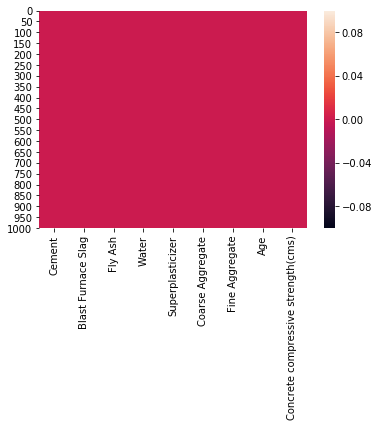

In [10]:
data.isnull().sum()
sb.heatmap(data.isnull())

In [11]:
#handaling missing values
from sklearn.preprocessing import Imputer

In [12]:
imp=Imputer(missing_values=0,strategy='mean',axis=0)
imp=imp.fit(data)
dst=imp.transform(data.values)
dst

array([[540.        , 136.15867621, 120.2887931 , ..., 676.        ,
         28.        ,  79.99      ],
       [540.        , 136.15867621, 120.2887931 , ..., 676.        ,
         28.        ,  61.89      ],
       [332.5       , 142.5       , 120.2887931 , ..., 594.        ,
        270.        ,  40.27      ],
       ...,
       [148.5       , 139.4       , 108.6       , ..., 780.        ,
         28.        ,  23.7       ],
       [159.1       , 186.7       , 120.2887931 , ..., 788.9       ,
         28.        ,  32.77      ],
       [260.9       , 100.5       ,  78.3       , ..., 761.5       ,
         28.        ,  32.4       ]])

In [13]:
dst=pd.DataFrame(dst)
dst

,0,1,2,3,4,5,6,7,8
0,540.0,136.158676,120.288793,162.0,2.500000,1040.0,676.0,28.0,79.99
1,540.0,136.158676,120.288793,162.0,2.500000,1055.0,676.0,28.0,61.89
2,332.5,142.500000,120.288793,228.0,9.816897,932.0,594.0,270.0,40.27
3,332.5,142.500000,120.288793,228.0,9.816897,932.0,594.0,365.0,41.05
4,198.6,132.400000,120.288793,192.0,9.816897,978.4,825.5,360.0,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.000000,90.300000,179.6,8.900000,870.1,768.3,28.0,44.28
1026,322.2,136.158676,115.600000,196.0,10.400000,817.9,813.4,28.0,31.18
1027,148.5,139.400000,108.600000,192.7,6.100000,892.4,780.0,28.0,23.70
1028,159.1,186.700000,120.288793,175.6,11.300000,989.6,788.9,28.0,32.77


In [14]:
y=dst.iloc[:,-1]

In [15]:
y.head()

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: 8, dtype: float64

In [16]:
data.keys()

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength(cms)'],
      dtype='object')

In [17]:
data.Cement

0       540.0
1       540.0
2       332.5
3       332.5
4       198.6
        ...  
1025    276.4
1026    322.2
1027    148.5
1028    159.1
1029    260.9
Name: Cement, Length: 1030, dtype: float64

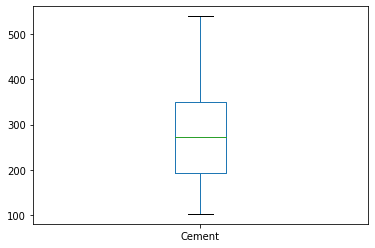

In [18]:
data['Cement'].plot.box()

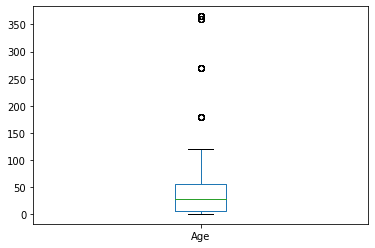

In [19]:
data['Age'].plot.box()

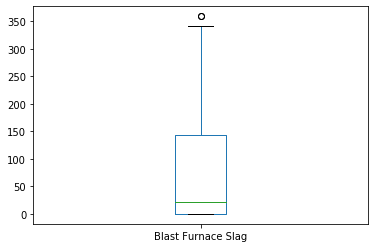

In [20]:
data['Blast Furnace Slag'].plot.box()

Cement                                   AxesSubplot(0.125,0.536818;0.133621x0.343182)
Blast Furnace Slag                    AxesSubplot(0.285345,0.536818;0.133621x0.343182)
Fly Ash                                AxesSubplot(0.44569,0.536818;0.133621x0.343182)
Water                                 AxesSubplot(0.606034,0.536818;0.133621x0.343182)
Superplasticizer                      AxesSubplot(0.766379,0.536818;0.133621x0.343182)
Coarse Aggregate                            AxesSubplot(0.125,0.125;0.133621x0.343182)
Fine Aggregate                           AxesSubplot(0.285345,0.125;0.133621x0.343182)
Age                                       AxesSubplot(0.44569,0.125;0.133621x0.343182)
Concrete compressive strength(cms)       AxesSubplot(0.606034,0.125;0.133621x0.343182)
dtype: object

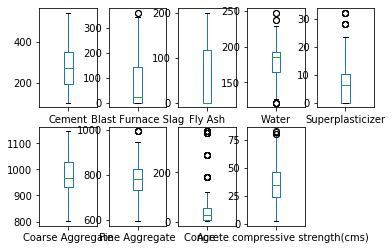

In [21]:
data.plot(kind='box',subplots=True,layout=(2,5))

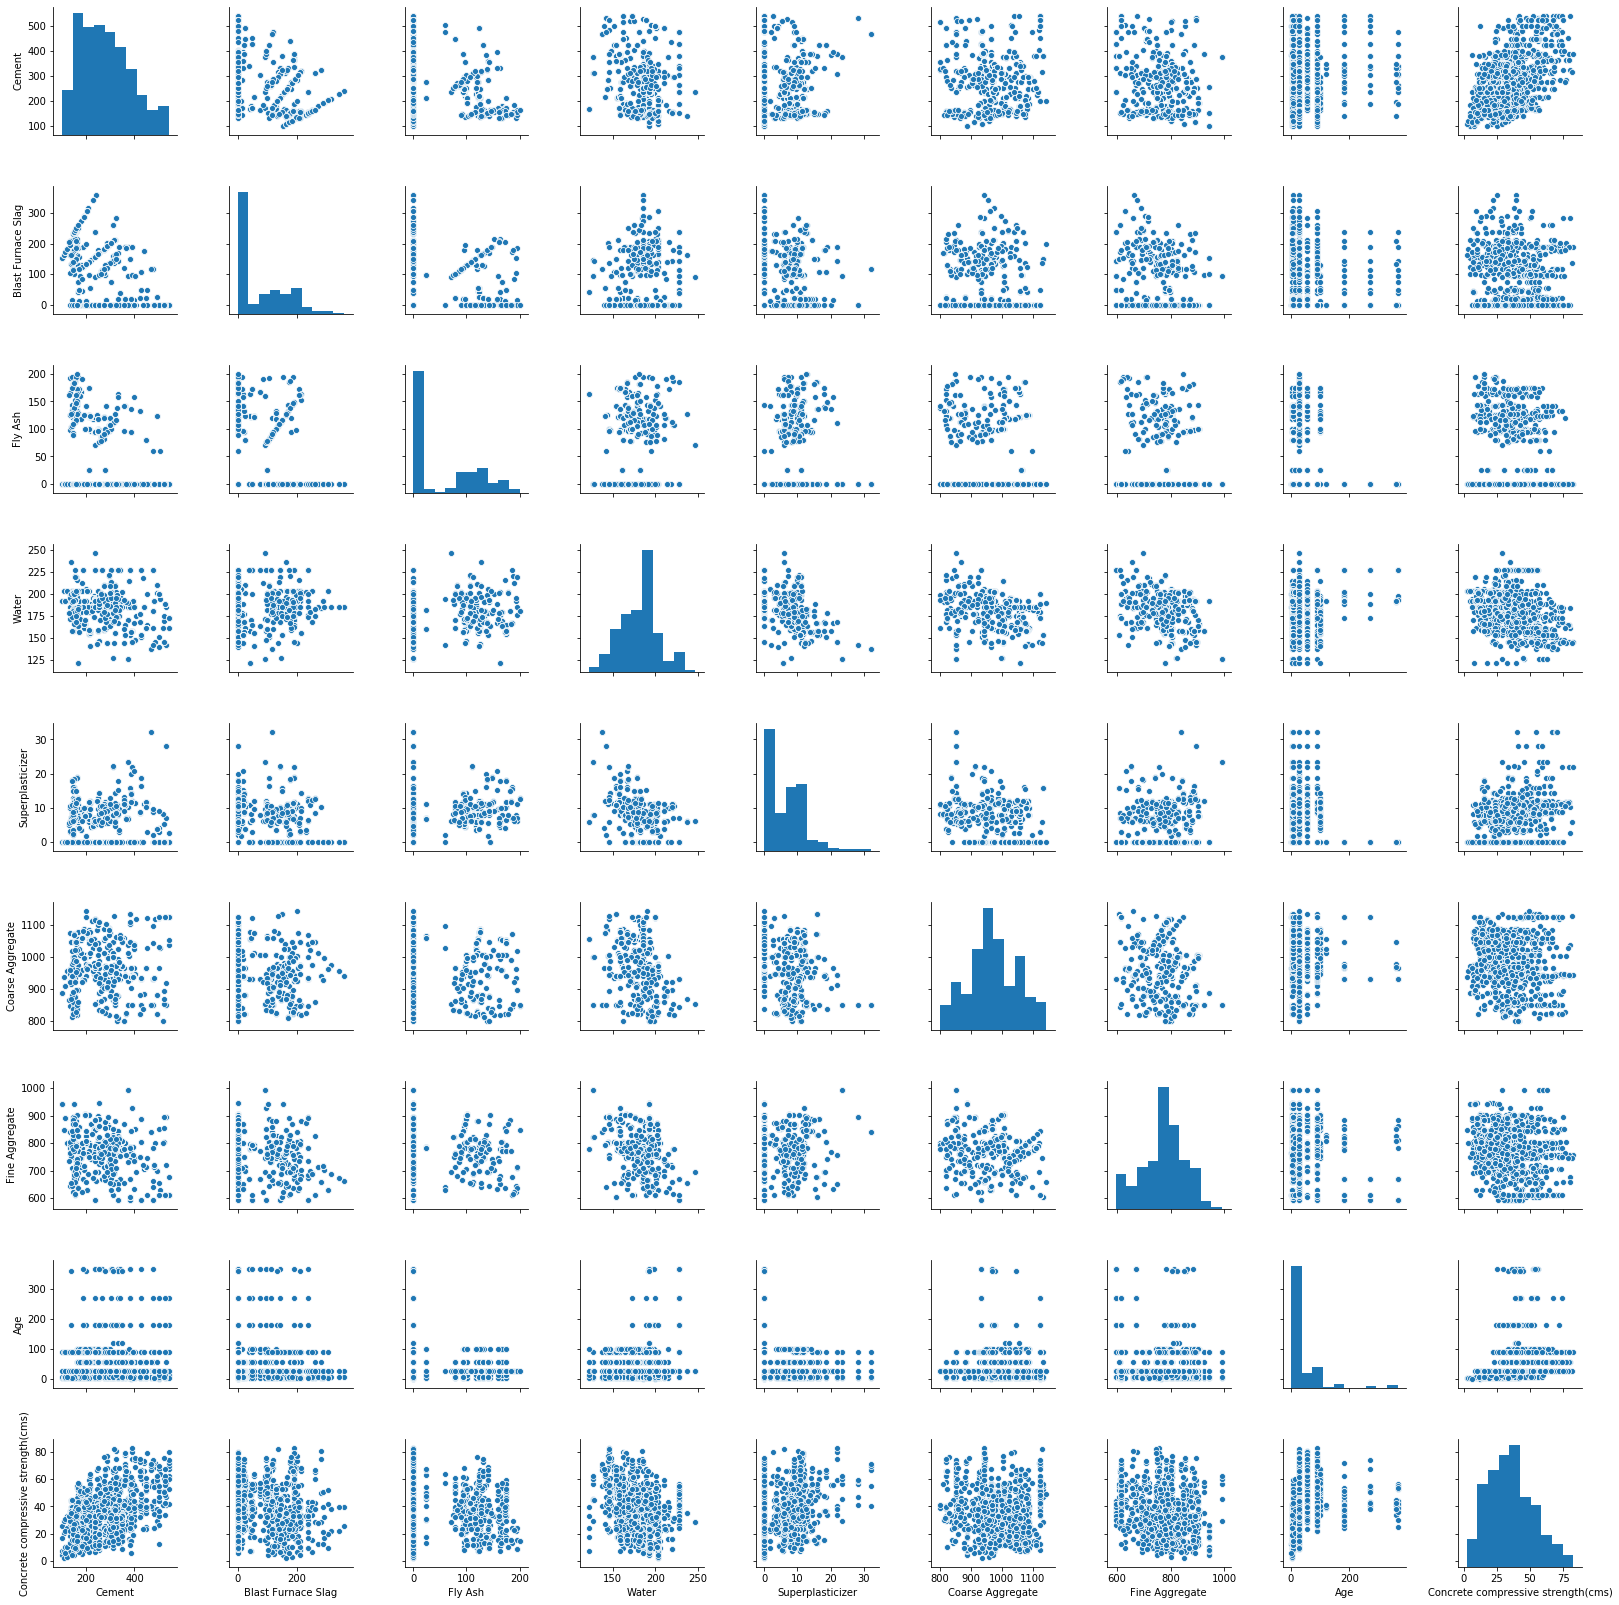

In [22]:
sb.pairplot(data)

<function matplotlib.pyplot.show(*args, **kw)>

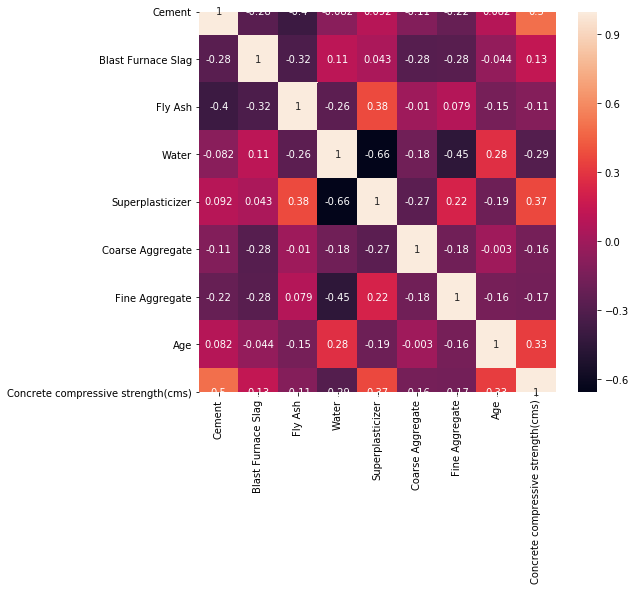

In [23]:
corr_hmap=data.corr()
plt.figure(figsize=(8,7))
sb.heatmap(corr_hmap,annot=True)
plt.show

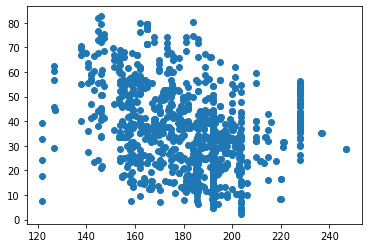

In [24]:
plt.scatter(data['Water'],data['Concrete compressive strength(cms)'])

In [25]:
data.drop('Water',axis=1,inplace=True)
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength(cms)
0,540.0,0.0,0.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,0.0,978.4,825.5,360,44.30


In [26]:
data

,Cement,Blast Furnace Slag,Fly Ash,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength(cms)
0,540.0,0.0,0.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,11.3,989.6,788.9,28,32.77


In [27]:
from scipy.stats import zscore
z=np.abs(zscore(data))
z

array([[2.47791487, 0.85688789, 0.84714393, ..., 1.21767004, 0.27973311,
        2.64540763],
       [2.47791487, 0.85688789, 0.84714393, ..., 1.21767004, 0.27973311,
        1.56142148],
       [0.49142531, 0.79552649, 0.84714393, ..., 2.24091709, 3.55306569,
        0.26662698],
       ...,
       [1.27008832, 0.75957923, 0.85063487, ..., 0.0801067 , 0.27973311,
        0.72572939],
       [1.16860982, 1.30806485, 0.84714393, ..., 0.19116644, 0.27973311,
        0.18253855],
       [0.19403325, 0.30849909, 0.3769452 , ..., 0.15074782, 0.27973311,
        0.20469738]])

In [28]:
threshold=3
print(np.where(z>3))

(array([  2,   3,   4,   6,  12,  17,  24,  25,  26,  30,  31,  33,  34,
        35,  41,  42,  56,  60,  61,  63,  65,  66,  76,  79,  99, 102,
       122, 125, 145, 148, 168, 171, 553, 559, 571, 584, 604, 610, 616,
       620, 622, 756, 769, 792, 798, 814, 820], dtype=int64), array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6], dtype=int64))


In [29]:
z[2][7]

0.2666269839411476

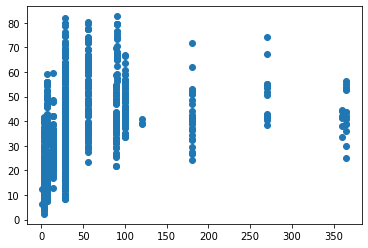

In [30]:
plt.scatter(data['Age'],data['Concrete compressive strength(cms)'])

In [31]:
corr_hmap=data.corr()

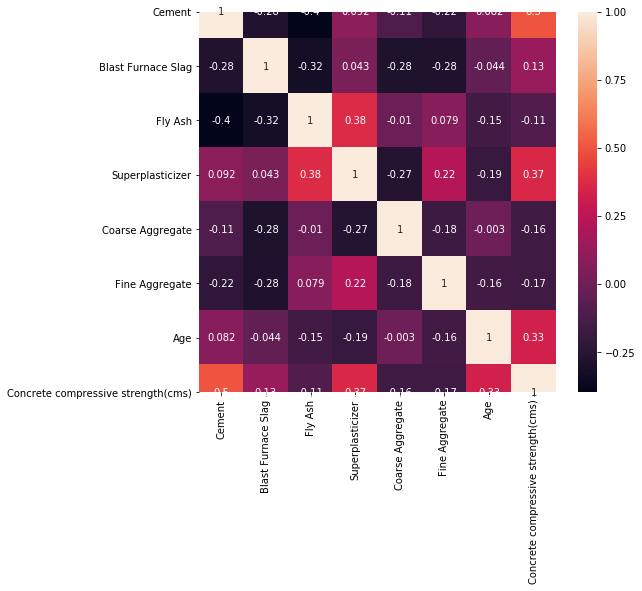

In [32]:
plt.figure(figsize=(8,7))
sb.heatmap(corr_hmap,annot=True)
plt.show()

In [33]:
data.shape

(1030, 8)

In [34]:
data_new=data[(z<3).all(axis=1)]

In [35]:
data.shape

(1030, 8)

In [36]:
data_new.shape

(983, 8)

In [37]:
data=data_new

In [38]:
data.shape

(983, 8)

In [39]:
#now training
x=data.iloc[:,0:-1]
x.head()

,Cement,Blast Furnace Slag,Fly Ash,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,2.5,1055.0,676.0,28
5,266.0,114.0,0.0,0.0,932.0,670.0,90
7,380.0,95.0,0.0,0.0,932.0,594.0,28
8,266.0,114.0,0.0,0.0,932.0,670.0,28


In [40]:
y=data.iloc[:,-1]
y.head()

0    79.99
1    61.89
5    47.03
7    36.45
8    45.85
Name: Concrete compressive strength(cms), dtype: float64

In [41]:
x.shape

(983, 7)

In [42]:
y.shape

(983,)

In [60]:
#from sklearn.preprocessing import StandardScaler
#scale=StandardScaler()
#x=scale.fit_transform(x)

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=52)

In [80]:
x_train.shape

(766, 7)

In [81]:
y_train.shape

(766,)

In [82]:
x_test.shape

(217, 7)

In [83]:
y_test.shape

(217,)

In [84]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
lm.coef_

array([14.33513522, 10.50014242,  6.89525714,  2.95026922,  3.25312831,
        3.79251188,  7.90940355])

In [86]:
lm.intercept_

35.158404781188906

In [87]:
data.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength(cms)'],
      dtype='object')

In [88]:
lm.score(x_train,y_train)

0.6760069596366943

In [89]:
#now predict the values
pred=lm.predict(x_test)
print("predicted result cement(cms): ",pred)
print("actual price :",y_test)

predicted result cement(cms):  [33.42285999 29.80937155  7.96980677 33.49071325 26.66016774 31.49727273
 28.37628887 44.14124691 63.89281472 22.80413552 57.87752614 23.03410244
 28.71821517 36.1237031  26.02351023 65.46062874 21.58775864 18.48754373
 37.68387682 54.96077683 36.47569305 24.76220576 45.40598014 45.00463997
 25.03271337 43.36374801 28.6280233  34.19787311 52.73108727 30.02307682
 22.58649964 29.94285434 28.65830437 67.70413024 57.87752614 19.17319828
 49.45628474 64.4551885  38.53550779 20.4264602  26.65872577 54.16973091
 34.44313193 31.00980338 56.89150248 27.37358041 40.24359171 43.86035245
 26.88505072 24.87311827 32.95600444 35.70663139 24.94630227 16.06207836
 27.07995719 39.89165152 45.07134462 54.59638989 27.06541917 40.17669705
 15.43804637 11.57660691 71.74410069 26.24084674 20.15427813 33.73274083
 17.0762922  29.76121276 41.91090931 18.6239301  23.17048287 22.93749141
 12.03596747 15.47989944 24.1293343  35.85986714 29.74102618 36.84104263
 40.34100321 34.5049

In [90]:
print('error:')
print(mean_squared_error(y_test,pred))

error:
71.8809761320575


In [91]:
#r2 score
from sklearn.metrics import r2_score

In [92]:
print(r2_score(y_test,pred))

0.7641981086192449


In [93]:
t=np.array([540.0,0.0,0.0,2.5,1040.0,676.0,28])

In [94]:
t.shape

(7,)

In [95]:
t=t.reshape(1,-1)
lm.predict(t)

array([13951.96186744])